<a href="https://colab.research.google.com/github/SOwens-Create/BabyPython/blob/master/ET_Full_Code_SOwens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Technique Project: Travel Package Purchase Prediction

In [210]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Problem Statement

### Context

The policymaker of a tourism company named "Visit with us" wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, and King. Looking at the data of the last year, it was observed that 18% of the customers purchased the packages. However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is a package that allows the traveler to maintain, enhance, or kick-start a healthy lifestyle, and support or increase one's sense of well-being. For the launch of the new package, the company wants to harness the available data of existing and potential customers to target the right customers.

### Objective

You as a Data Scientist at "Visit with us" travel company has to analyze the customer data and information to provide recommendations to the policymaker and build a model to predict the chances of a potential customer purchasing the newly introduced travel package before the customer is contacted.

### Data Dictionary

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Product pitched by the salesperson
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore: Sales pitch satisfaction score
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

## Importing necessary libraries

In [348]:
#Import libraries for dataframe methods
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import tree
from os import system
from statistics import mean
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import plotly.express as px

## Loading the dataset

In [212]:
#Dataset loaded from google drive
df=pd.read_csv('/content/drive/MyDrive/Tourism.csv')

## Data Overview

In [213]:
#Generic observations of the data will be made here.
#Shape explains that there are 4888 rows and 20 columns to the data set
df.shape

(4888, 20)

In [214]:
#The head method shows a brief overview of the first ten rows.
#The data frame has categorical and continuous data columns that will need to be treated.
#Age, Duration of Pitch, Monthly Income, and Customer ID are all continuous variables.
#The customer ID is a unique number for each row and will be dropped.
#There are a few NaN values that will need treated.
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [215]:
#Using the info method, there are seven columns of int64
#seven columns of float64, and six columns of object datatypes.
#The different datatypes will be treated in the preprocessing section.
#The Age, TypeofContract, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar,
#NumberofTrips, NumberOfChildrenVisiting, and MonthlyIncome all contain null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [216]:
#All of the data preprocessing is completed after the Exploratory Data Analysis

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the monthly income of customers? Are there any noticeable patterns or outliers in the distribution?
2. Which travel package is pitched the most by the salespersons to the customers?
3. How are the different customer attributes correlated to each other?
4. How does a customer's interest in purchasing the newly introduced travel package vary with their occupation?
5. How does a customer's interest in purchasing the newly introduced travel package vary with their marital status?

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

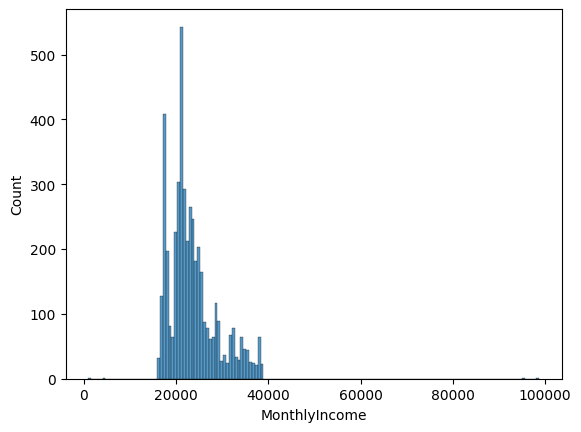

In [217]:
#EDA Question #1 - What is the distribution of the monthly income of customers?
#Are there any noticeable patterns or outliers in the distribution?

#The histogram shows the monthly income as being right skewed data.
#The average is close to $25,000.
#There are some outliers near the $100,000 range.
sns.histplot(data=df, x='MonthlyIncome')

<Axes: xlabel='MonthlyIncome'>

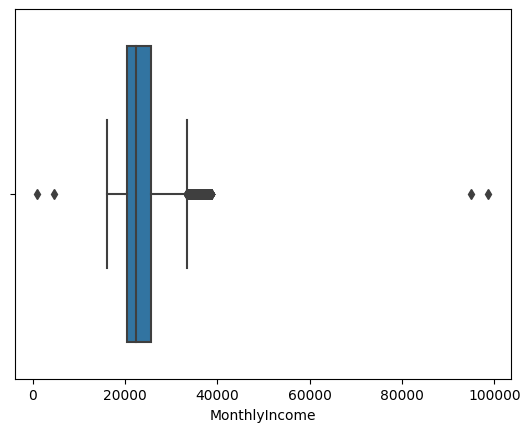

In [218]:
#Boxplot to show the outliers in more detail.
#There are outliers at the high end near $100,000 and at the low end near $0.
sns.boxplot(data=df, x='MonthlyIncome')

<Axes: xlabel='ProductPitched', ylabel='count'>

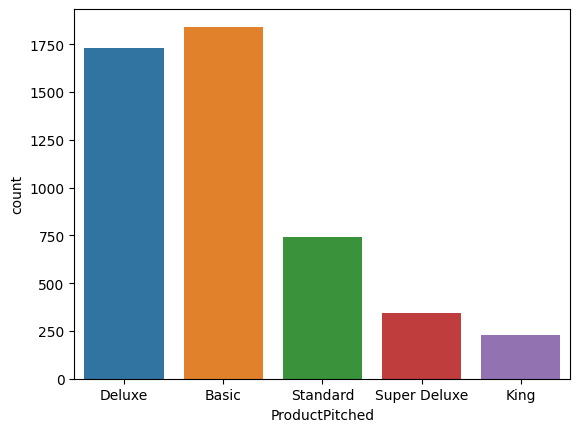

In [219]:
#EDA Question #2 - Which travel package is pitched the most by the salespersons to the customers?

#The most frequently pitched products are Basic and Deluxe.
sns.countplot(data=df, x='ProductPitched')

In [220]:
#EDA Question #3 - How are the different customer attributes correlated to each other?
df.corr()

<ipython-input-220-86f61e95e91e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.032127,0.012975,0.064298,0.604013,0.427539,0.010553,0.224848,0.007974,-0.035847,0.003805,0.511763,0.276833
ProdTaken,0.056506,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,0.032127,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.012975,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.064298,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.604013,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.427539,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.010553,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.224848,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.007974,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545


<ipython-input-221-6dc1c4c1753e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

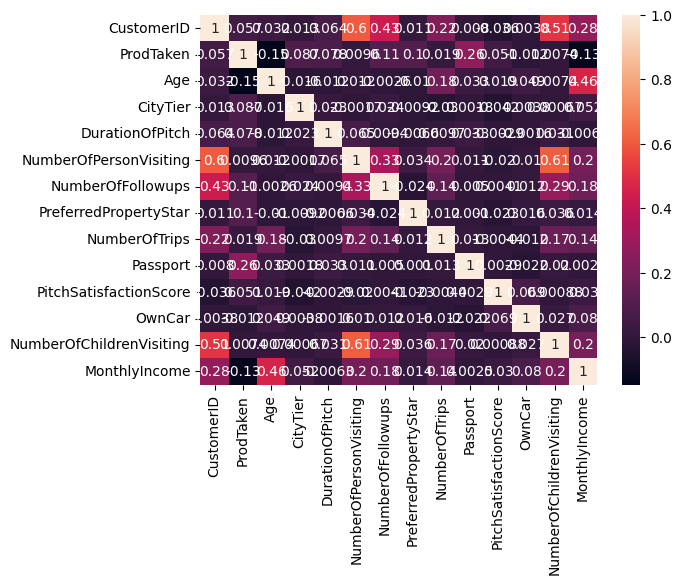

In [221]:
sns.heatmap(df.corr(), annot=True)

In [222]:
#There is a strong correlation between Age and Monthly Income. This makes sense.
#The number of follow-ups and the number of people visiting have some correlation.
#The customer attribute variables do not appear to have strong correlations.
#The Customer ID variable is irrelvant as it is just a continuous count and can be dropped.
#Only the continuous variables appear in the heatmap.
#The plots below will show the relations of the categorical attribute variables.

<Axes: xlabel='Occupation', ylabel='Count'>

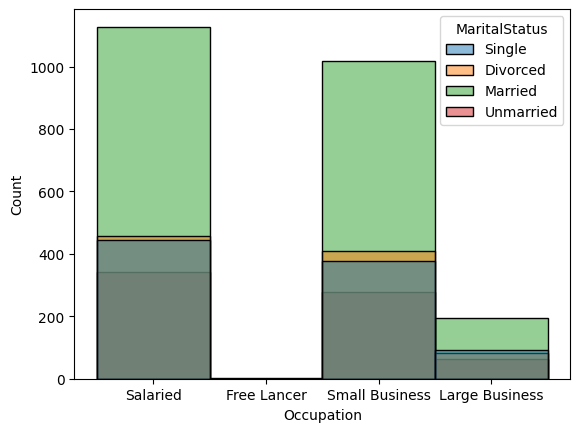

In [223]:
#The majority of the customers appear to be married accross occupation.
sns.histplot(data=df, x='Occupation', hue='MaritalStatus')

<Axes: xlabel='Occupation', ylabel='Count'>

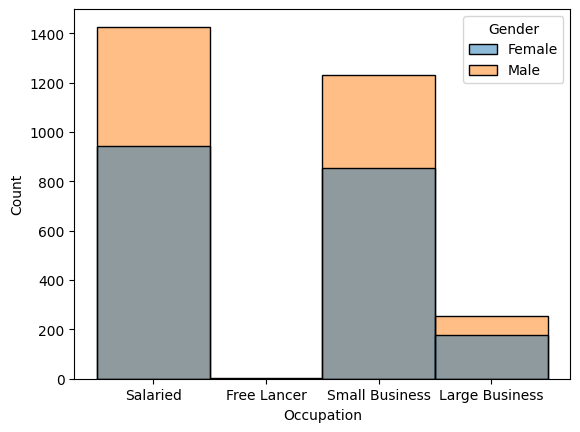

In [224]:
#The correlation between gender and occupation appears to show the
#largest gap for salaried employees.
#The gap for large business and gender is the smallest.
sns.histplot(data=df, x='Occupation', hue='Gender')

<Axes: xlabel='Occupation', ylabel='Count'>

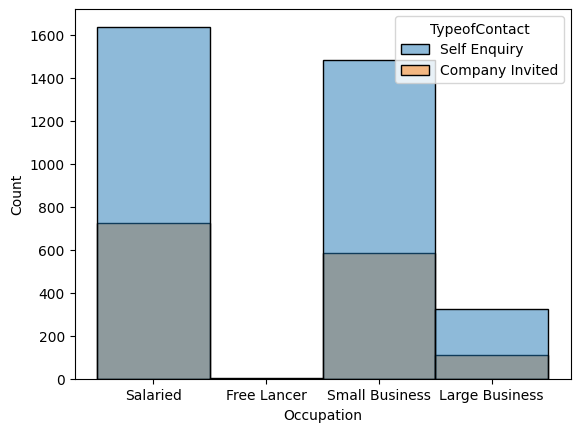

In [225]:
#EDA Question #4 - How does a customer's interest in purchasing the newly
#introduced travel package vary with their occupation?

#A few variables indicate interest in purchasing - TypeofContact, ProdTaken, and ProductPitched
#The salaried employees and small business owners sent the most self inquiries.
sns.histplot(data=df, x='Occupation', hue='TypeofContact')

<Axes: xlabel='Occupation', ylabel='Count'>

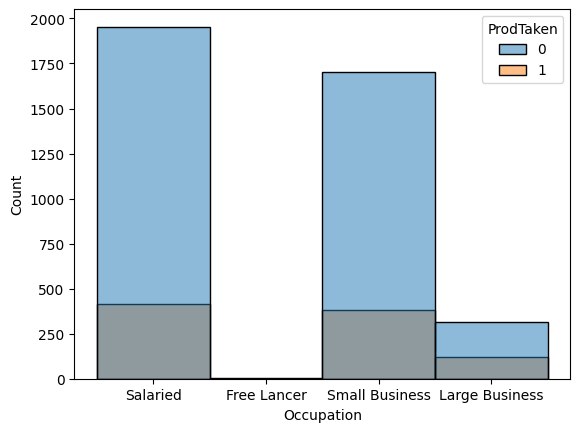

In [226]:
#Close to 20% of the customers decided to take the product in the salaried and small business categories.
#The percentage is much higher for large business owners.
sns.histplot(data=df, x='Occupation', hue='ProdTaken')

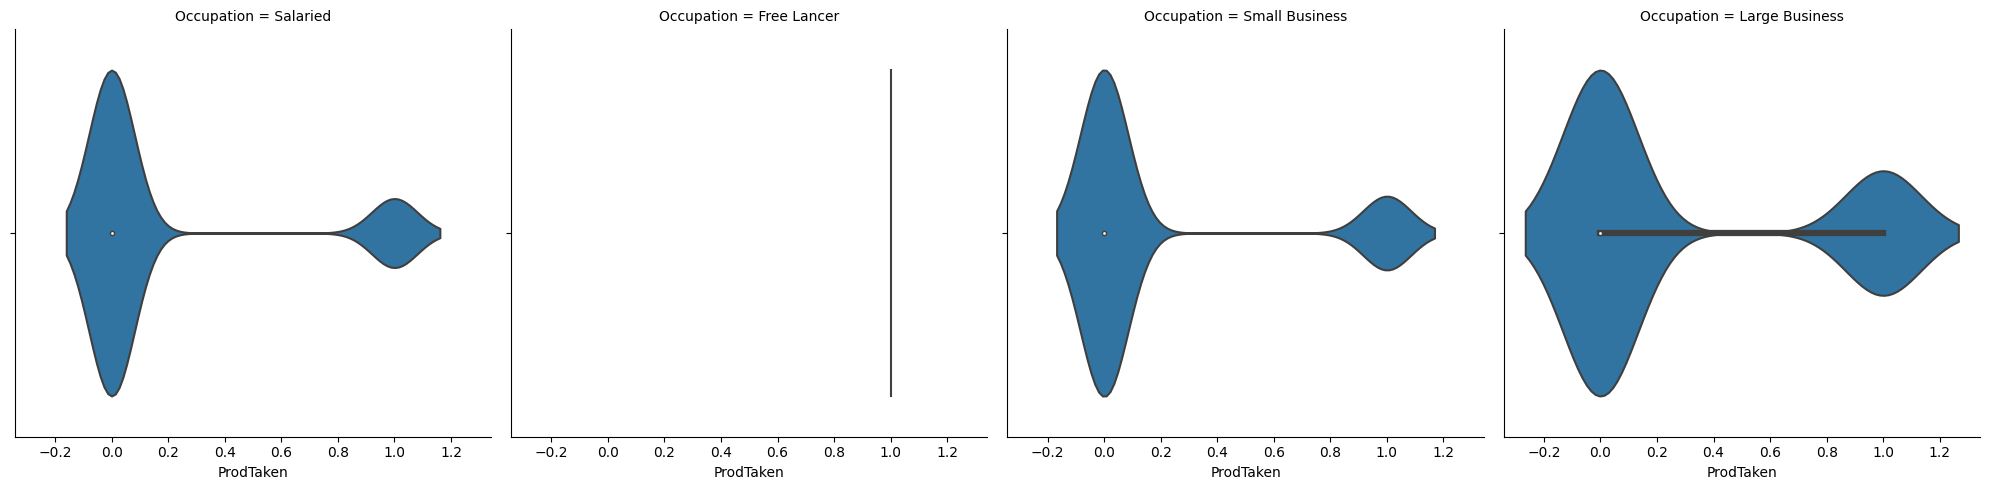

In [227]:
#The large business owners appear to take the product most often.
sns.catplot(data=df, x='ProdTaken', col='Occupation', kind="violin")

<Axes: xlabel='Occupation', ylabel='Count'>

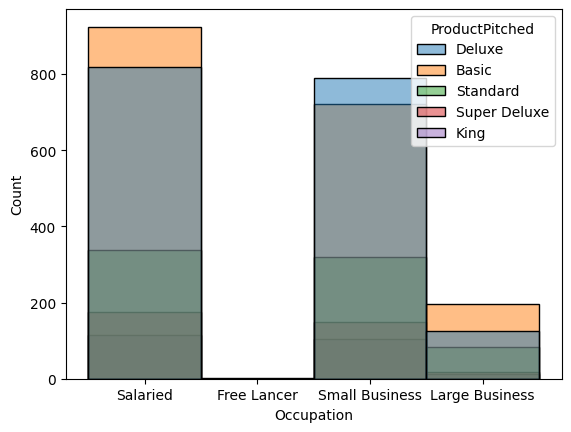

In [228]:
#The salaried employees were pitched the Basic most often.
#While the small business owners were pitched the Deluxe most often.
#The large business owners were pitched the Basic most often.
sns.histplot(data=df, x='Occupation', hue='ProductPitched')

<Axes: xlabel='MaritalStatus', ylabel='Count'>

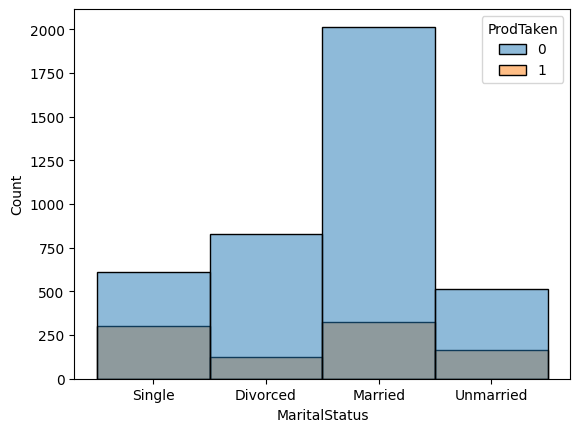

In [229]:
#EDA Question #5 - How does a customer's interest in purchasing the newly introduced
#travel package vary with their marital status?

sns.histplot(data=df, x='MaritalStatus', hue='ProdTaken')

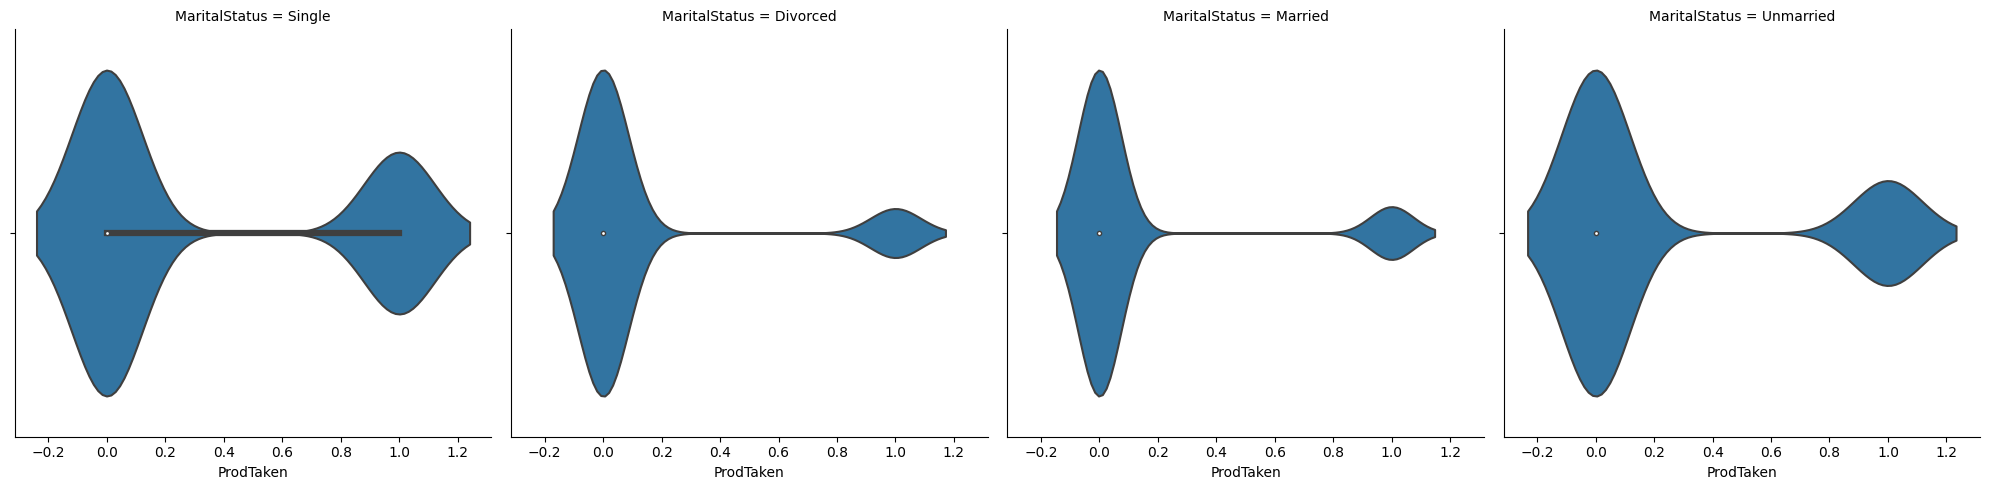

In [230]:
#The violin plots seem to show that the single buyers take the product most often
sns.catplot(data=df, x='ProdTaken', col='MaritalStatus', kind="violin")

<Axes: xlabel='ProductPitched', ylabel='Count'>

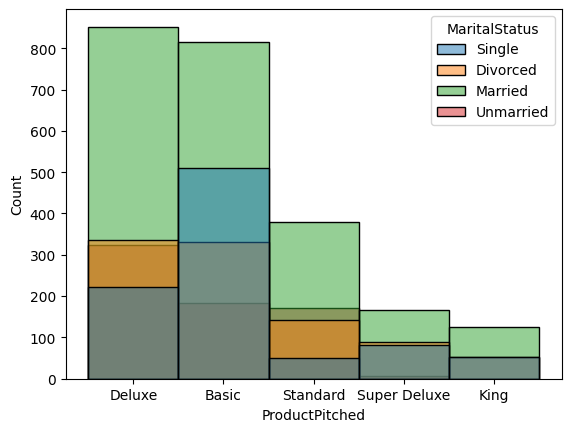

In [231]:
#The most popular product among the single customers is the Basic package
sns.histplot(data=df, x='ProductPitched', hue='MaritalStatus')

<Axes: xlabel='TypeofContact', ylabel='Count'>

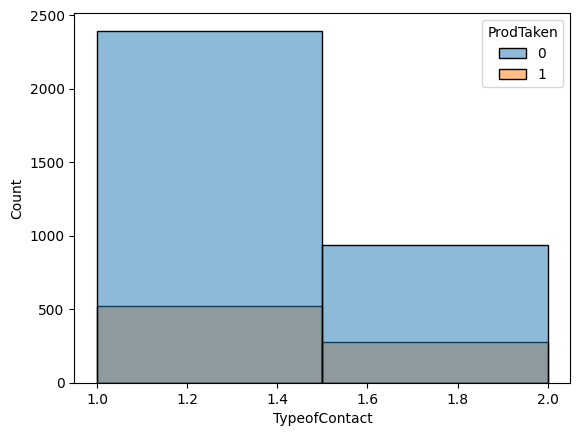

In [378]:
#Some additional plots below are for reference.
#The subject of interest is whether a customer will buy the product before they are contacted.
#The self inquiries seem to be more than double the company invites, but their success rate is only 20%.
#The company invite quantity is less, but the percentage is closer to 30%.
sns.histplot(data=df, x='TypeofContact', hue='ProdTaken', bins=2)

<Axes: xlabel='TypeofContact', ylabel='count'>

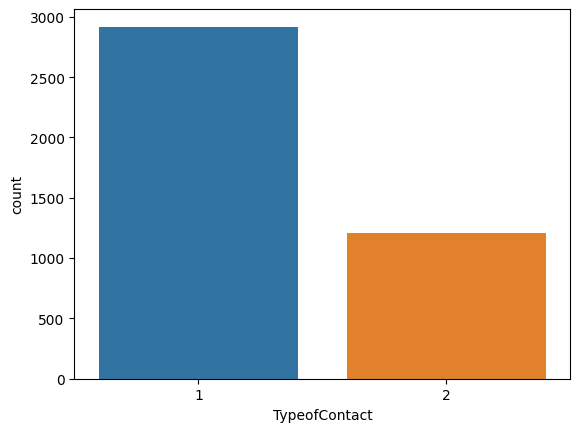

In [377]:
#The company receives more self inquiries than company invitations.
sns.countplot(data=df, x='TypeofContact')

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [232]:
#First the customer ID column must be dropped.
df.drop(['CustomerID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [233]:
#Compared to the overall number of data values, the quantity of null values is very small.
#Because they are small, they will be dropped. It should not impact the results much.
#This reduces the overall number of data rows from 4888 to 4128 complete rows.

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4128 non-null   int64  
 1   Age                       4128 non-null   float64
 2   TypeofContact             4128 non-null   object 
 3   CityTier                  4128 non-null   int64  
 4   DurationOfPitch           4128 non-null   float64
 5   Occupation                4128 non-null   object 
 6   Gender                    4128 non-null   object 
 7   NumberOfPersonVisiting    4128 non-null   int64  
 8   NumberOfFollowups         4128 non-null   float64
 9   ProductPitched            4128 non-null   object 
 10  PreferredPropertyStar     4128 non-null   float64
 11  MaritalStatus             4128 non-null   object 
 12  NumberOfTrips             4128 non-null   float64
 13  Passport                  4128 non-null   int64  
 14  PitchSat

In [234]:
#The object types of the data need to be treated.
#All of the float64 data will need to be converted to int64
#One-hot coding will be used for the object variable types.

df['Age']=df['Age'].astype(int)
df['DurationOfPitch']=df['DurationOfPitch'].astype(int)
df['NumberOfFollowups']=df['NumberOfFollowups'].astype(int)
df['PreferredPropertyStar']=df['PreferredPropertyStar'].astype(int)
df['NumberOfTrips']=df['NumberOfTrips'].astype(int)
df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].astype(int)
df['MonthlyIncome']=df['MonthlyIncome'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ProdTaken                 4128 non-null   int64 
 1   Age                       4128 non-null   int64 
 2   TypeofContact             4128 non-null   object
 3   CityTier                  4128 non-null   int64 
 4   DurationOfPitch           4128 non-null   int64 
 5   Occupation                4128 non-null   object
 6   Gender                    4128 non-null   object
 7   NumberOfPersonVisiting    4128 non-null   int64 
 8   NumberOfFollowups         4128 non-null   int64 
 9   ProductPitched            4128 non-null   object
 10  PreferredPropertyStar     4128 non-null   int64 
 11  MaritalStatus             4128 non-null   object
 12  NumberOfTrips             4128 non-null   int64 
 13  Passport                  4128 non-null   int64 
 14  PitchSatisfactionScore  

In [235]:
#There are six variables left that are object type.

df['TypeofContact']=df['TypeofContact'].replace({'Self Enquiry':1,'Company Invited':2})
df['Occupation']=df['Occupation'].replace({'Salaried':1,'Free Lancer':2, 'Small Business':3, 'Large Business':4})
df['Gender']=df['Gender'].replace({'Male':1,'Female':2})
df['ProductPitched']=df['ProductPitched'].replace({'Deluxe':1,'Basic':2, 'Standard':3, 'Super Deluxe':4, 'King':5})
df['MaritalStatus']=df['MaritalStatus'].replace({'Married':1,'Unmarried':2, 'Single':3, 'Divorced':4})
df['Designation']=df['Designation'].replace({'Senior Manager':1,'AVP':2, 'VP':3, 'Executive':4, 'Manager':5})
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41,1,3,6,1,2,3,3,1,3,3,1,1,2,1,0,5,20993
1,0,49,2,1,14,1,1,3,4,1,4,4,2,0,3,1,2,5,20130
2,1,37,1,1,8,2,1,3,4,2,3,3,7,1,3,0,0,4,17090
3,0,33,2,1,9,1,2,2,3,2,3,4,2,1,5,1,1,4,17909
5,0,32,2,1,8,1,1,3,3,2,3,3,1,0,5,1,1,4,18068


In [236]:
#Now we can see that there are no null values and all of the data
#are of the type int64 and the data is ready for building the model.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   ProdTaken                 4128 non-null   int64
 1   Age                       4128 non-null   int64
 2   TypeofContact             4128 non-null   int64
 3   CityTier                  4128 non-null   int64
 4   DurationOfPitch           4128 non-null   int64
 5   Occupation                4128 non-null   int64
 6   Gender                    4128 non-null   int64
 7   NumberOfPersonVisiting    4128 non-null   int64
 8   NumberOfFollowups         4128 non-null   int64
 9   ProductPitched            4128 non-null   int64
 10  PreferredPropertyStar     4128 non-null   int64
 11  MaritalStatus             4128 non-null   int64
 12  NumberOfTrips             4128 non-null   int64
 13  Passport                  4128 non-null   int64
 14  PitchSatisfactionScore    4128 non-null 

## Model Building

### Model Evaluation Criterion

* The models will be evaluated based on the F1 score, Accuracy, and Recall
* The client wants to predict whether customers will take the product or not. This will be dependent variable.


### Model Building: Decision Tree

In [237]:
#Prep data for train, test, split by dropping the dependent variable.
x=df.drop('ProdTaken', axis=1)
y=df['ProdTaken']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

x_train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3656,35,1,1,26,1,2,3,5,2,3,1,3,0,4,1,2,4,21607
3877,26,1,3,15,1,2,3,4,1,3,1,2,1,1,1,2,5,23585
4024,52,2,1,7,3,2,2,5,3,5,2,5,0,1,1,1,1,26162
4223,32,1,1,12,4,1,3,4,2,3,1,2,1,4,1,1,4,23499
3910,40,1,1,13,3,1,3,5,3,5,1,6,0,4,1,1,1,28669


In [383]:
#Creating the decision tree using the gini score and then displaying the score values
dTree=DecisionTreeClassifier(criterion='gini', random_state=1)
dTree.fit(x_train, y_train)

print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.8724778046811945


['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']


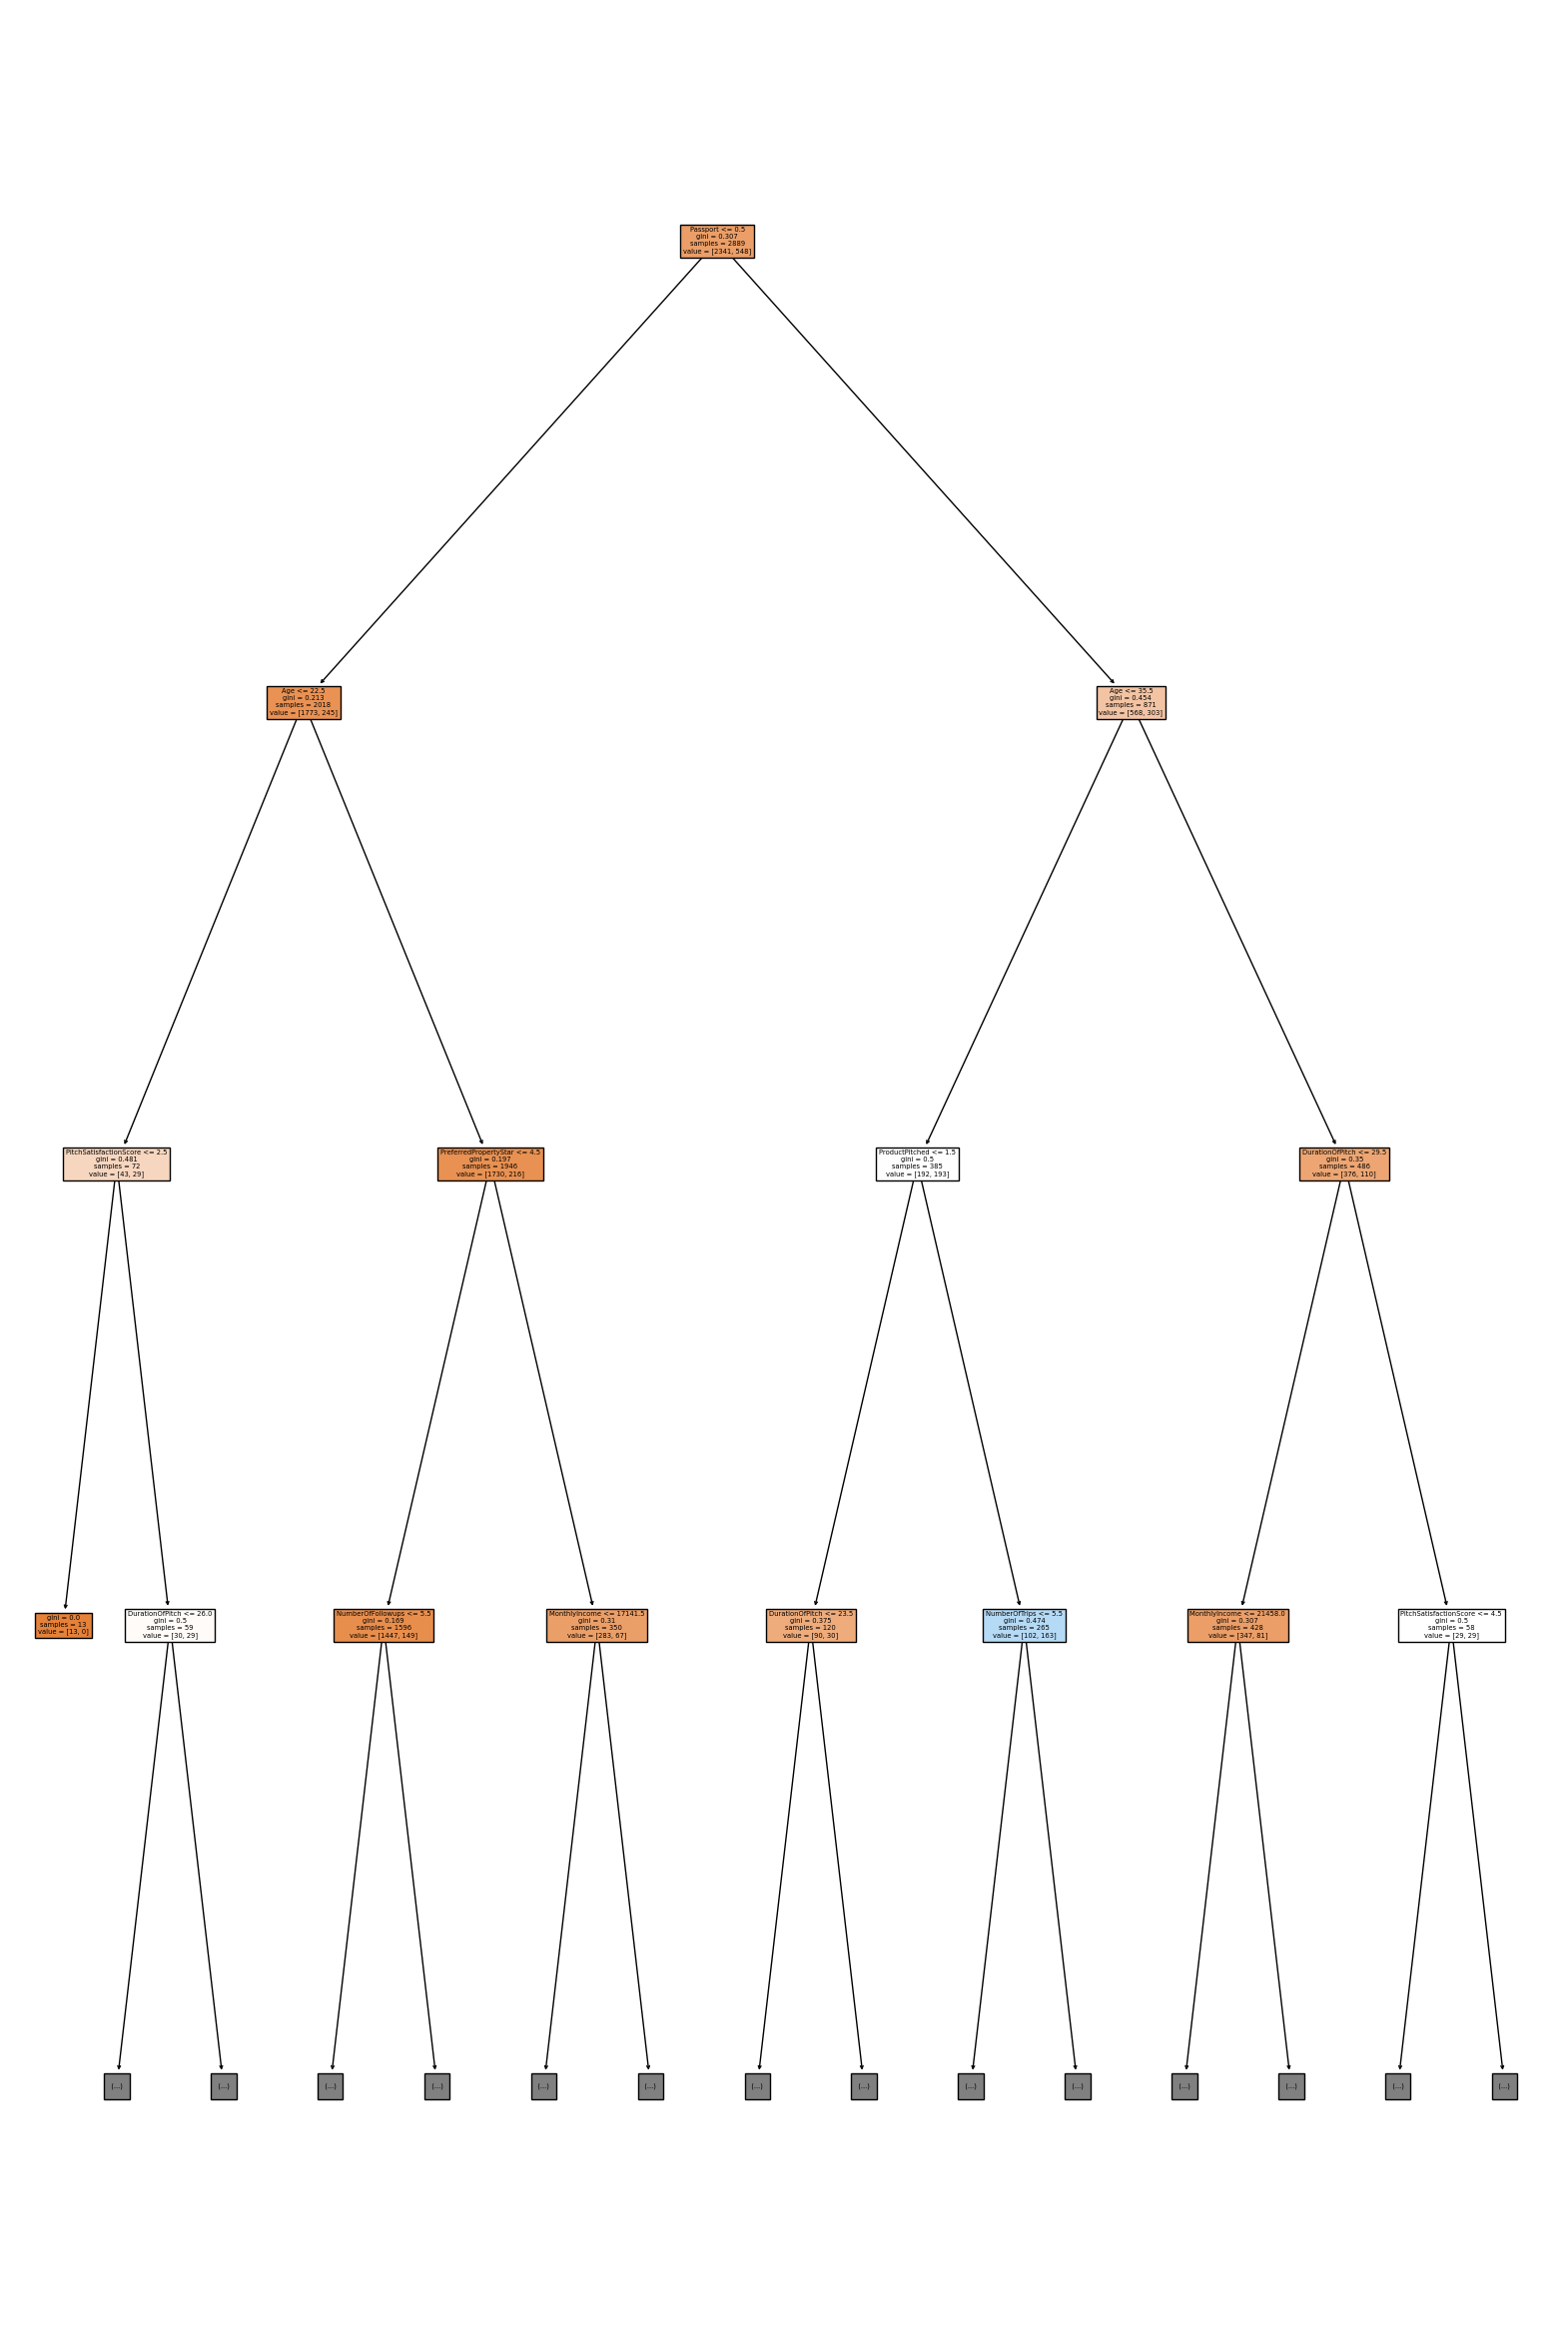

In [384]:
#Show the decision tree based on a gini impurity analysis with a max depth of 3
feature_names=list(x_train.columns)
print(feature_names)
plt.figure(figsize=(20,30))
tree.plot_tree(dTree, filled=True, feature_names=feature_names, max_depth=3)
plt.show()

In [239]:
#Examing the feature importances relevant to Personal_Loan
#The age of the client is the most important factor in determining whether or not they will
#take the product. Followed by monthly income and then the duration of the pitch.
pd.DataFrame(dTree.feature_importances_, columns=["Imp"], index=x_train.columns).sort_values(by="Imp")

,Imp
NumberOfChildrenVisiting,0.014545
NumberOfPersonVisiting,0.014685
OwnCar,0.015808
Designation,0.016093
Occupation,0.025175
Gender,0.034111
CityTier,0.034324
TypeofContact,0.034735
NumberOfFollowups,0.037177
PreferredPropertyStar,0.039660


In [272]:
#I added some code to view the confusion matrix of the logistic regression.
#It looks like the data is giving a lot of false positives.
#This means that we are prediciting that the client took the product when they did not.
#There are 7 false negatives - The client took the product and the data shows that they did not.
#We will need to refine this in the next step.
dTree=DecisionTreeClassifier(criterion='gini', random_state=1)
dTree.fit(x_train, y_train)
y_predict=dTree.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm)

[[166  83]
 [ 75 915]]


In [255]:
#I also wanted to look at he precision and recall of this model.
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy Train: ',dTree.score(x_train, y_train))
print('Accuracy Test: ',dTree.score(x_test, y_test))

Precision:  0.851063829787234
Recall:  0.1606425702811245
Accuracy Train:  1.0
Accuracy Test:  0.8724778046811945


### Model Improvement: Decision Tree

In [258]:
#Building the Model
x=df.drop('ProdTaken', axis=1)
y=df['ProdTaken']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

x_train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3656,35,1,1,26,1,2,3,5,2,3,1,3,0,4,1,2,4,21607
3877,26,1,3,15,1,2,3,4,1,3,1,2,1,1,1,2,5,23585
4024,52,2,1,7,3,2,2,5,3,5,2,5,0,1,1,1,1,26162
4223,32,1,1,12,4,1,3,4,2,3,1,2,1,4,1,1,4,23499
3910,40,1,1,13,3,1,3,5,3,5,1,6,0,4,1,1,1,28669


In [269]:
#Try using a different max depth and set the criterion to entropy in order to create a new model.
#The accuracy is improved while maintaining the recall and precision
dTree=DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=1)
dTree.fit(x_train, y_train)
y_predict=dTree.predict(x_test)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy Train: ',dTree.score(x_train, y_train))
print('Accuracy Test: ',dTree.score(x_test, y_test))


Precision:  0.7268722466960352
Recall:  0.6626506024096386
Accuracy Train:  0.9941156109380408
Accuracy Test:  0.8821630347054076


In [273]:
#Printing the updated confusion matrix
dTree=DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=1)
dTree.fit(x_train, y_train)
y_predict=dTree.predict(x_test)
cm1=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm1)

[[165  84]
 [ 62 928]]


['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']


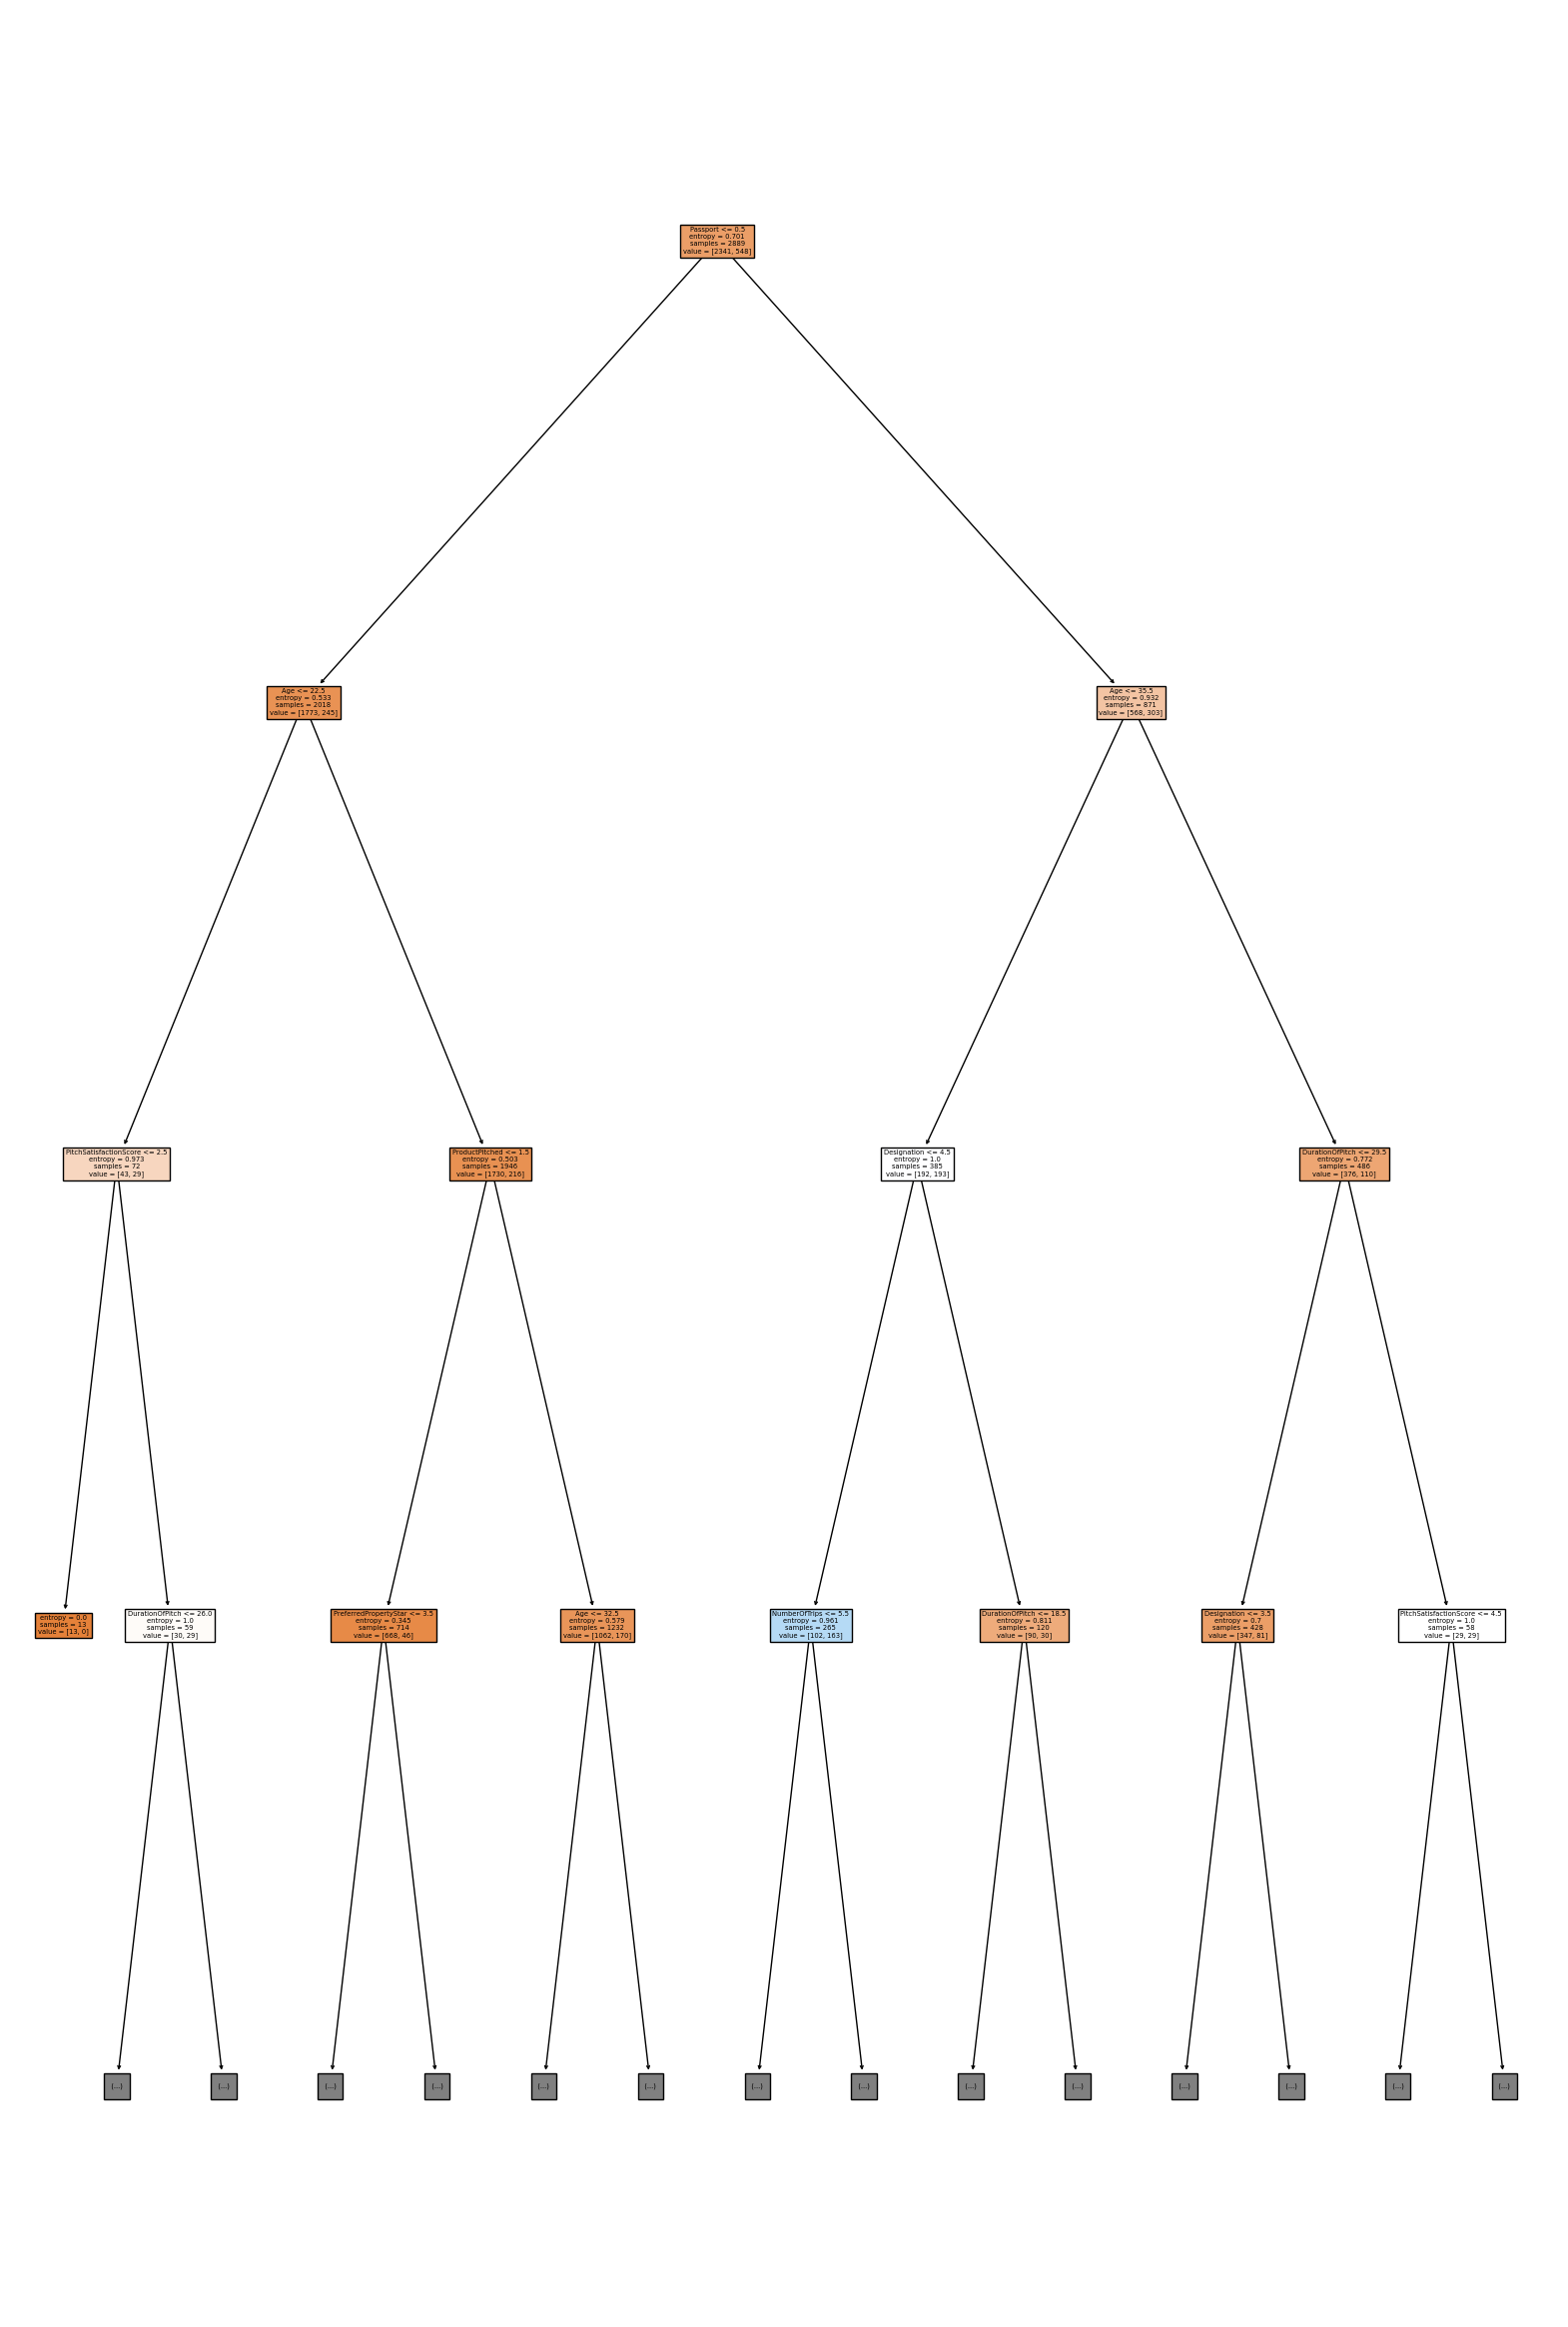

In [382]:
#Showing the decision tree plot with entropy and a max depth of 3
feature_names=list(x_train.columns)
print(feature_names)
plt.figure(figsize=(20,30))
tree.plot_tree(dTree, filled=True, feature_names=feature_names, max_depth=3)
plt.show()

### Model Building: Random Forest

In [274]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(x_train, y_train)
y_predict=rf_estimator.predict(x_test)
rf_estimator_precision=precision_score(y_test, y_predict)
rf_estimator_recall=recall_score(y_test, y_predict)
rf_estimator_accuracy=accuracy_score(y_test, y_predict)

#Printing the score values of the random forest classifier
print('Precision: ', rf_estimator_precision)
print('Recall: ', rf_estimator_recall)
print('Accuracy: ', rf_estimator_accuracy)

Precision:  0.959731543624161
Recall:  0.5742971887550201
Accuracy:  0.9096045197740112


In [275]:
#Printing the updated confusion matrix
rf_predict=rf_estimator.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm)

[[143 106]
 [  6 984]]


### Model Improvement: Random Forest

In [318]:
#Train the random forest classifier
#The criterion was changed to entropy from gini for a better fit.
rf_estimator=RandomForestClassifier(random_state=1, criterion='entropy')
rf_estimator.fit(x_train, y_train)
y_predict=rf_estimator.predict(x_test)
rf_estimator_precision=precision_score(y_test, y_predict)
rf_estimator_recall=recall_score(y_test, y_predict)
rf_estimator_accuracy=accuracy_score(y_test, y_predict)

#Printing the score values of the random forest classifier
print('Random Forest Precision :', rf_estimator_precision)
print('Random Forest Recall :', rf_estimator_recall)
print('Random Forest Accuracy :', rf_estimator_accuracy)

Random Forest Precision : 0.9857142857142858
Random Forest Recall : 0.5542168674698795
Random Forest Accuracy : 0.9087974172719936


In [319]:
#Printing the updated confusion matrix
rf_predict=rf_estimator.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm)

[[138 111]
 [  2 988]]


### Model Building: Bagging

In [287]:
#Using the bagging classifier
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(x_train, y_train)
y_predict=bagging_estimator.predict(x_test)

#Retreiving the scores of the bagging classifier
bagging_precision=precision_score(y_test, y_predict)
bagging_recall=recall_score(y_test, y_predict)
bagging_accuracy=accuracy_score(y_test, y_predict)

#Printing the score values of the bagging classifier
print('Bagging Precision :', bagging_precision)
print('Bagging Recall :', bagging_recall)
print('Bagging Accuracy :', bagging_accuracy)

Bagging Precision : 0.8333333333333334
Bagging Recall : 0.5421686746987951
Bagging Accuracy : 0.8861985472154964


In [279]:
#Printing the updated confusion matrix
bagging_predict=bagging_estimator.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm)

[[135 114]
 [ 27 963]]


### Model Improvement: Bagging

In [296]:
#Using the bagging classifier
#Boot strapping was turned off and the max samples were varied until an improved model was reached
bagging_estimator=BaggingClassifier(max_samples=.70, bootstrap=False, random_state=1)
bagging_estimator.fit(x_train, y_train)
y_predict=bagging_estimator.predict(x_test)

#Retreiving the scores of the bagging classifier
bagging_precision=precision_score(y_test, y_predict)
bagging_recall=recall_score(y_test, y_predict)
bagging_accuracy=accuracy_score(y_test, y_predict)

#Printing the score values of the bagging classifier
print('Bagging Precision :', bagging_precision)
print('Bagging Recall :', bagging_recall)
print('Bagging Accuracy :', bagging_accuracy)

Bagging Precision : 0.8719512195121951
Bagging Recall : 0.5742971887550201
Bagging Accuracy : 0.897497982243745


In [297]:
#Printing the updated confusion matrix
bagging_predict=bagging_estimator.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm)

[[143 106]
 [ 21 969]]


### Model Building: AdaBoost

In [280]:
#Using the AdaBoost classifier
AdaBoost_estimator=AdaBoostClassifier(random_state=1)
AdaBoost_estimator.fit(x_train, y_train)
y_predict=AdaBoost_estimator.predict(x_test)

#Retreiving the scores of the AdaBoost classifier
AdaBoost_precision=precision_score(y_test, y_predict)
AdaBoost_recall=recall_score(y_test, y_predict)
AdaBoost_accuracy=accuracy_score(y_test, y_predict)

#Printing the score values of the AdaBoost classifier
print('AdaBoost Precision :', AdaBoost_precision)
print('AdaBoost Recall :', AdaBoost_recall)
print('AdaBoost Accuracy :', AdaBoost_accuracy)

AdaBoost Precision : 0.7007874015748031
AdaBoost Recall : 0.357429718875502
AdaBoost Accuracy : 0.8401937046004843


In [281]:
#Printing the updated confusion matrix
AdaBoost_predict=AdaBoost_estimator.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm)

[[ 89 160]
 [ 38 952]]


### Model Improvement: AdaBoost

In [329]:
#Using the AdaBoost classifier
#The number of estimators is modified to improve the model.
AdaBoost_estimator=AdaBoostClassifier(random_state=1, n_estimators=30)
AdaBoost_estimator.fit(x_train, y_train)
y_predict=AdaBoost_estimator.predict(x_test)

#Retreiving the scores of the AdaBoost classifier
AdaBoost_precision=precision_score(y_test, y_predict)
AdaBoost_recall=recall_score(y_test, y_predict)
AdaBoost_accuracy=accuracy_score(y_test, y_predict)

#Printing the score values of the AdaBoost classifier
print('AdaBoost Precision :', AdaBoost_precision)
print('AdaBoost Recall :', AdaBoost_recall)
print('AdaBoost Accuracy :', AdaBoost_accuracy)

AdaBoost Precision : 0.7333333333333333
AdaBoost Recall : 0.3534136546184739
AdaBoost Accuracy : 0.8442292171105731


In [330]:
#Printing the updated confusion matrix
AdaBoost_predict=AdaBoost_estimator.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm)

[[ 88 161]
 [ 32 958]]


### Model Building: Gradient Boosting

In [282]:
#Using the Gradient Boosting Classifier
Gradient_estimator=GradientBoostingClassifier(random_state=1)
Gradient_estimator.fit(x_train, y_train)
y_predict=Gradient_estimator.predict(x_test)

#Retreiving the scores of the Gradient Boosting classifier
Gradient_precision=precision_score(y_test, y_predict)
Gradient_recall=recall_score(y_test, y_predict)
Gradient_accuracy=accuracy_score(y_test, y_predict)

#Printing the score values of the Gradient Boosting classifier
print('Gradient Boost Precision :', Gradient_precision)
print('Gradient Boost Recall :', Gradient_recall)
print('Gradient Boost Accuracy :', Gradient_accuracy)

Gradient Boost Precision : 0.788135593220339
Gradient Boost Recall : 0.37349397590361444
Gradient Boost Accuracy : 0.8539144471347861


In [284]:
#Printing the updated confusion matrix
Gradient_predict=Gradient_estimator.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm)

[[ 93 156]
 [ 25 965]]


### Model Improvement: Gradient Boosting


In [337]:
#Using the Gradient Boosting Classifier
#The learning rate and number of estimators is modified to improve the model.
Gradient_estimator=GradientBoostingClassifier(random_state=1, loss='log_loss', learning_rate=0.3, n_estimators=50)
Gradient_estimator.fit(x_train, y_train)
y_predict=Gradient_estimator.predict(x_test)

#Retreiving the scores of the Gradient Boosting classifier
Gradient_precision=precision_score(y_test, y_predict)
Gradient_recall=recall_score(y_test, y_predict)
Gradient_accuracy=accuracy_score(y_test, y_predict)

#Printing the score values of the Gradient Boosting classifier
print('Gradient Boost Precision :', Gradient_precision)
print('Gradient Boost Recall :', Gradient_recall)
print('Gradient Boost Accuracy :', Gradient_accuracy)

Gradient Boost Precision : 0.7709923664122137
Gradient Boost Recall : 0.40562248995983935
Gradient Boost Accuracy : 0.8563357546408394


In [338]:
#Printing the updated confusion matrix
#Decrease in false positives.
Gradient_predict=Gradient_estimator.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm)

[[101 148]
 [ 30 960]]


### Model Building: XGBoost

**Please note XGBoost can take a significantly longer time to run, so if you have time complexity issues then you can avoid tuning XGBoost, and there will no points deducted if XG-boost is not performed**

In [285]:
#Using the XGBoost Classifier
XGBoost_estimator=XGBClassifier(random_state=1)
XGBoost_estimator.fit(x_train, y_train)
y_predict=XGBoost_estimator.predict(x_test)

#Retreiving the scores of the XGBoosting classifier
XGBoost_precision=precision_score(y_test, y_predict)
XGBoost_recall=recall_score(y_test, y_predict)
XGBoost_accuracy=accuracy_score(y_test, y_predict)

#Printing the score values of the XGBoosting classifier
print('XGBoost Precision :', XGBoost_precision)
print('XGBoost Recall :', XGBoost_recall)
print('XGBoost Accuracy :', XGBoost_accuracy)

XGBoost Precision : 0.9060773480662984
XGBoost Recall : 0.6586345381526104
XGBoost Accuracy : 0.9176755447941889


In [286]:
#Printing the updated confusion matrix
XGBoost_predict=XGBoost_estimator.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm)

[[164  85]
 [ 17 973]]


### Model Improvement: XGBoost


In [346]:
#Using the XGBoost Classifier. I changed the number of estimators to improve the model fit.
XGBoost_estimator=XGBClassifier(random_state=1, n_estimators=110)
XGBoost_estimator.fit(x_train, y_train)
y_predict=XGBoost_estimator.predict(x_test)

#Retreiving the scores of the XGBoosting classifier
XGBoost_precision=precision_score(y_test, y_predict)
XGBoost_recall=recall_score(y_test, y_predict)
XGBoost_accuracy=accuracy_score(y_test, y_predict)

#Printing the score values of the XGBoosting classifier
print('XGBoost Precision :', XGBoost_precision)
print('XGBoost Recall :', XGBoost_recall)
print('XGBoost Accuracy :', XGBoost_accuracy)

XGBoost Precision : 0.9120879120879121
XGBoost Recall : 0.6666666666666666
XGBoost Accuracy : 0.9200968523002422


In [347]:
#Printing the updated confusion matrix.
#The false positives decrease by 2.
XGBoost_predict=XGBoost_estimator.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm)

[[166  83]
 [ 16 974]]


### Model Building: Stacking

In [365]:
#Using the Stacking Classifier
estimators=['Age', 'Gender', 'MaritalStatus', 'ProdTaken']
Stacking_estimator=StackingClassifier(estimators='estimators')

#Retreiving the scores of the Stacking classifier
Stacking_precision=precision_score(y_test, y_predict)
Stacking_recall=recall_score(y_test, y_predict)
Stacking_accuracy=accuracy_score(y_test, y_predict)

#Printing the score values of the Stacking classifier
print('Stacking Precision :', Stacking_precision)
print('Stacking Recall :', Stacking_recall)
print('Stacking Accuracy :', Stacking_accuracy)

Stacking Precision : 0.9120879120879121
Stacking Recall : 0.6666666666666666
Stacking Accuracy : 0.9200968523002422


### Model Improvement: Stacking


In [363]:
#Using the Stacking Classifier
estimators1=['ProductPitched', 'DurationOfPitch', 'ProdTaken']
Stacking_estimator=StackingClassifier(estimators='estimators1', final_estimator='ProdTaken')

#Retreiving the scores of the Stacking classifier
Stacking_precision=precision_score(y_test, y_predict)
Stacking_recall=recall_score(y_test, y_predict)
Stacking_accuracy=accuracy_score(y_test, y_predict)

#Printing the score values of the Stacking classifier
print('Stacking Precision :', Stacking_precision)
print('Stacking Recall :', Stacking_recall)
print('Stacking Accuracy :', Stacking_accuracy)

Stacking Precision : 0.9120879120879121
Stacking Recall : 0.6666666666666666
Stacking Accuracy : 0.9200968523002422


## Model Comparison and Final Model Selection

In [379]:
#The best model should minimize the number of false positives while maintaining a balance of accuracy and recall.
#The best fit appears to be the improved XGBoost
#This model has 83 false positives and 16 false negatives. There are still 83 instances of a customer predicted to take the product
#where they didn't actually take it.
#The 16 represents instances where the customer was categorized not to accept the product, but actually did take it.
#The accuracy and precision are very high.
#Recall could be better, but this is the best model.

#Printing the score values of the XGBoosting classifier
print('XGBoost Precision :', XGBoost_precision)
print('XGBoost Recall :', XGBoost_recall)
print('XGBoost Accuracy :', XGBoost_accuracy)

#Printing the updated confusion matrix.
#The false positives decrease by 2.
XGBoost_predict=XGBoost_estimator.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm)

XGBoost Precision : 0.9120879120879121
XGBoost Recall : 0.6666666666666666
XGBoost Accuracy : 0.9200968523002422
[[166  83]
 [ 16 974]]


## Actionable Insights and Business Recommendations


**What recommedations would you suggest to the Visit with us company?**

* The duration of the sales pitch seems to make the greatest impact on whether the product is purchased.
* The success rate is higher (almost 30%) when the product is pitched to a large business as opposed to 18% when pitched to other occupations.  
* In the original problem statement, the client is interested in finding out whether a customer will take the product before being contacted. It appears that the number of self inquiries far outweighs the number of company invites. Close to 70% of all of the data comes from self inquiry. However, the success rates vary. Company invites reflect nearly a 30% success rate vs self inquiries having approximately 20% success rate.
* The basic product is most popular among salaried employees and large business owners. While the deluxe option is the favored product for small business owners.
* The basic product is also most popular among single customers. Possibly a monetary savings or the package meets the needs of a single person best. I would recommend researching why this product is appealing to the specific demographic and attempt to replicate the package "fit" to the other groups.

___